<a href="https://colab.research.google.com/github/mahdid-lilia/SIC_Samsung-Innovation-Campus-AI-Course/blob/main/wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Coding Exercise #0508

In [1]:
# Install WordCloud once.
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from wordcloud import WordCloud
import numpy as np
import nltk
import re
import os
import matplotlib.pyplot as plt
from PIL import Image                         # From the Pillow library import the Image module.
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
%matplotlib inline
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. Visualize the text data as a WordCloud:

In [4]:
f = open("/content/drive/MyDrive/data_set/book_crime_and_punishment.txt",'r',encoding='UTF8')
my_book = f.readlines()
f.close()

#### 1.1. Pre-processing:

In [5]:
n_min = 4                                                           # Minimum number of characters. 
corpus = []
lemmatizer = WordNetLemmatizer()
for a_line in my_book:
    pre = re.sub(r'\W', ' ', a_line)                                # Substitute the non-alphanumerics character by space.
    pre = re.sub(r'\d+','', pre)                                    # Remove numbers.
    pre = nltk.word_tokenize(pre)                                   # Tokenize into words.
    pre = [x for x in pre if len(x) > n_min]                        # Minimum length.
    pre = [x.lower() for x in pre]                                  # Convert into the lowercase.
    pre = [x for x in pre if x not in stopwords.words('english')]   # Remove stopwords.
    pre = [lemmatizer.lemmatize(x) for x in pre]                    # Lemmatize.
    corpus += pre                                                   # Back to the corpus.

In [6]:
len(corpus)

64245

#### 1.2. Generate a basic wordcloud:

In [9]:
# WordCloud requires that the imput data be a single long string.
a_long_sentence = ' '.join(corpus)

In [11]:
a_long_sentence

'chapter exceptionally evening early young garret lodged place walked slowly though hesitation towards bridge successfully avoided meeting landlady staircase garret storied house cupboard landlady provided garret dinner attendance lived floor every obliged kitchen invariably stood passed young frightened feeling scowl ashamed hopelessly landlady afraid meeting cowardly abject quite contrary overstrained irritable condition verging hypochondria become completely absorbed isolated fellow dreaded meeting landlady anyone crushed poverty anxiety position ceased weigh given attending matter practical importance desire nothing landlady could terror stopped stair forced listen trivial irrelevant gossip pestering demand payment threat complaint brain excuse prevaricate rather would creep stair unseen evening however coming street became acutely aware fear attempt thing _like that_ frightened trifle thought smile hand cowardice axiom would interesting afraid taking uttering talking chatter nothi

In [10]:
wc = WordCloud(background_color='white', max_words=30)              # Customize the output.
wc.generate(a_long_sentence)
wc.words_                                                          # Check for the top ranking words.                                                         

{'raskolnikov': 1.0,
 'though': 0.6368876080691642,
 'sonia': 0.5187319884726225,
 'razumihin': 0.47262247838616717,
 'thought': 0.46253602305475505,
 'dounia': 0.43515850144092216,
 'nothing': 0.40778097982708933,
 'something': 0.40634005763688763,
 'little': 0.4048991354466859,
 'suddenly': 0.38760806916426516,
 'began': 0.3818443804034582,
 'thing': 0.345821325648415,
 'still': 0.345821325648415,
 'looked': 0.3285302593659942,
 'woman': 0.3270893371757925,
 'right': 0.31412103746397696,
 'katerina ivanovna': 0.3112391930835735,
 'almost': 0.30979827089337175,
 'think': 0.30835734870317005,
 'svidrigaïlov': 0.3025936599423631,
 'perhaps': 0.3011527377521614,
 'first': 0.29971181556195964,
 'moment': 0.2910662824207493,
 'without': 0.2881844380403458,
 'looking': 0.28530259365994237,
 'another': 0.27089337175792505,
 'going': 0.26512968299711814,
 'mother': 0.26512968299711814,
 'seemed': 0.2507204610951009,
 'pyotr petrovitch': 0.24927953890489912}

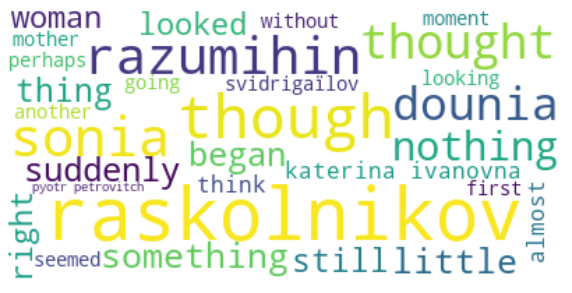

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # Turn off the axes.
plt.show()